Uses [NYC's Leading Causes of Death](https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam) dataset to graph deaths by cancer among racial and ethnic groups and between genders.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data from the CSV exported from NYC Open Data
frame = pd.read_csv("nycdeaths.csv")
# Isolate the suicide data
frame = frame[frame['Leading Cause'].str.contains("Cancer")]

# Clean and inspect the data
frame['Sex'] = frame['Sex'].str[0]
frame = frame.replace({'.':np.NaN,'NaN':np.NaN})
frame = frame.sort_values('Year')
frame = frame.replace("Non-Hispanic","NH",regex=True).replace({"NH White":"White NH","NH Black":"Black NH"})
frame

Year                          Leading Cause Sex  \
297   2007  Malignant Neoplasms (Cancer: C00-C97)   M   
877   2007  Malignant Neoplasms (Cancer: C00-C97)   F   
946   2007  Malignant Neoplasms (Cancer: C00-C97)   M   
407   2007  Malignant Neoplasms (Cancer: C00-C97)   M   
632   2007  Malignant Neoplasms (Cancer: C00-C97)   M   
...    ...                                    ...  ..   
1976  2021  Malignant Neoplasms (Cancer: C00-C97)   M   
1965  2021  Malignant Neoplasms (Cancer: C00-C97)   M   
2079  2021  Malignant Neoplasms (Cancer: C00-C97)   F   
2010  2021  Malignant Neoplasms (Cancer: C00-C97)   M   
2090  2021  Malignant Neoplasms (Cancer: C00-C97)   F   

                  Race Ethnicity Deaths Death Rate Age Adjusted Death Rate  
297           Not Stated/Unknown     45        NaN                     NaN  
877                     White NH   3518      245.2                   167.4  
946                     White NH   3356      250.9                   213.7  
407        Other Race/ Ethnicity     29        NaN                     NaN  
632   Asian and Pacific Islander    528      109.1                   145.9  
...                          ...    ...        ...                     ...  
1976  Asian and Pacific Islander    719      116.8                   102.1  
1965                    Hispanic   1123         94                   110.1  
2079       Other Race/ Ethnicity     61        NaN                     NaN  
2010       Other Race/ Ethnicity     52        NaN                     NaN  
2090          Not Stated/Unknown     59        NaN                     NaN  

[182 rows x 7 columns]

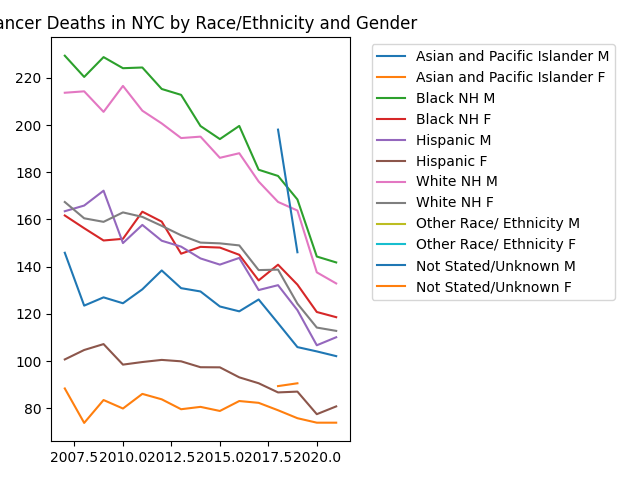

In [7]:
%matplotlib widget
fig, ax = plt.subplots()

ax.set_title("Cancer Deaths in NYC by Race/Ethnicity and Gender")

subframes = {}

for race in ['Asian and Pacific Islander','Black NH','Hispanic','White NH','Other Race/ Ethnicity','Not Stated/Unknown']:
    for sex in ['M','F']:
        subframes[race+" "+sex] = frame.loc[(frame['Sex']==sex)&(frame['Race Ethnicity']==race)]

# narrow = frame.loc[(frame['Sex']=='M')&(frame['Race Ethnicity']=='White NH')]

for key in subframes.keys():
    subframe = subframes[key]
    ax.plot(subframe['Year'].to_numpy(int),subframe['Age Adjusted Death Rate'].to_numpy(float),label=key)

ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.ion();